## **Week 1: Data Loading, EDA, NLP Preprocessing**

In [154]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### Download required resources

In [155]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load Data

In [156]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Infotact Internship/Project 1/Task Assignment.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
df.shape

(20122, 8)

###  **Step 1 : Data Preprocessing and EDA (Exploratory Data Analysis)**

### Rename the columns

In [158]:
df.rename(columns={
    'Unnamed: 3': 'Deadline',
    'Unnamed: 4': 'Priority',
    'Unnamed: 5': 'User Skills',
    'Unnamed: 6': 'Workload',
    'Unnamed: 7': 'Assigned User'
}, inplace=True)

### Counting Unique Task Discription , Category and Skill

In [159]:
unique_tasks = df['Task Description'].unique()
print("Total unique task descriptions:", len(unique_tasks))

unique_categories = df['Category'].unique()
print("Total unique categories:", len(unique_categories))

unique_skills = df['Skill'].unique()
print("Total unique skills:", len(unique_skills))


Total unique task descriptions: 265
Total unique categories: 13
Total unique skills: 232


### Counting and removing duplicate rows

In [160]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 19333


In [161]:
df = df.drop_duplicates()

In [162]:
df.shape

(789, 8)

In [163]:
df.head()

,Task Description,Category,Skill,Deadline,Priority,User Skills,Workload,Assigned User
0,Implement user authentication,backend,spring boot,NaN,NaN,NaN,NaN,NaN
1,Optimize server performance,backend,asp.net,NaN,NaN,NaN,NaN,NaN
2,Manage database operations,backend,django,NaN,NaN,NaN,NaN,NaN
3,Implement user authentication,backend,api,NaN,NaN,NaN,NaN,NaN
4,Build a microservice,backend,kotlin,NaN,NaN,NaN,NaN,NaN


### Checking null values

In [164]:
print("Null values:\n", df.isnull().sum())

Null values:
 Task Description      0
Category              0
Skill                 0
Deadline            789
Priority            789
User Skills         789
Workload            789
Assigned User       789
dtype: int64


### Drop rows where Task Description or Skill is missing

In [165]:
df.dropna(subset=['Task Description', 'Skill'], inplace=True)

### Checking Class Imbalance in category and skills Columns

#### (1) Distribution of task categories

In [166]:
print("Category distribution:\n", df['Category'].value_counts())

Category distribution:
 Category
ai/ml                      127
backend                    122
frontend                   112
devops                      74
deployment                  71
database administration     64
testing                     58
project management          58
documentation               53
cloud                       35
data science                 5
database                     5
ui/ux design                 5
Name: count, dtype: int64


####  **Category Distribution**
**:) Dominant Categories:**

ai/ml (127), backend (122), frontend (112)

**:) Moderate:**

devops, deployment, database administration, testing, project management, documentation

**:) Very Low ( Underrepresented):**

cloud, data science, database, ui/ux design (only 5 tasks each)

 **Action:**


Left untouched because the dataset is for real-world scenario modeling.





#### (2) Distribution of skills (if the column is a single skill per row)

In [167]:
print("\nSkill distribution:\n", df['Skill'].value_counts())


Skill distribution:
 Skill
aws                    15
docker                 15
kubernetes             15
google cloud           14
heroku                 13
                       ..
Logistic Regression     1
pytorch                 1
apache spark            1
nltk                    1
tensorflow              1
Name: count, Length: 232, dtype: int64


### **Skill Distribution**
**:) Most Frequent:**

aws, docker, kubernetes, google cloud, heroku

**:) Very Rare (Appears only once):**

tensorflow, nltk, apache spark, pytorch, etc.

**Action:**

Since there are 232 unique skills, this natural imbalance is okay.

No immediate need to balance unless we're using them as prediction labels (which we're not).

#### Extract unique skills from 'Skill' column

In [168]:
all_skills = df['Skill'].dropna().str.lower().str.split(',').sum()
unique_skills = list(set([skill.strip() for skill in all_skills]))

### list of 40 user names

In [169]:
users = [
    'Bhagyashree', 'Dhwani', 'Simran', 'Charu', 'Riya', 'Neha', 'Shivani', 'Moksha', 'Somya', 'Muskan',
    'Utkarsha', 'Prachi', 'Ritika', 'Alice', 'Nafisa', 'Rishika', 'Divya', 'Ankita', 'Jyotika', 'Tannu',
    'Akash', 'Daksh', 'Deepraj', 'Vaibhav', 'Faizan', 'Melvin', 'Kartik', 'Ashish', 'Sourav', 'Mohsin',
    'Apporva', 'Rajan', 'Bhavya', 'Robinsh', 'Jayant', 'Aditya', 'Raj', 'Rohan', 'Ishaan', 'Sameer'
]

#### Assign 3–4 random skills from unique_skills to each user

In [170]:
user_skill_map = {}
for user in users:
    assigned_skills = random.sample(unique_skills, random.choice([3, 4]))
    user_skill_map[user] = assigned_skills

In [171]:
for user, skills in user_skill_map.items():
    print(f"{user}: {skills}")

Bhagyashree: ['kubeflow', 'dialogflow', 'optuna', 'alibi detect']
Dhwani: ['ux', 'h2o.ai', 'scikit-learn', 'augmentor']
Simran: ['mongodb', 'materialize', 'oracle', 'linear regression']
Charu: ['rnn', 'k-means', 'lda']
Riya: ['agile', 'yolov5', 'python', 'yolo']
Neha: ['bm25', 'junit', 'transformer', 'gsap']
Shivani: ['git', 'postgresql', 'laravel']
Moksha: ['facenet', 'doc2vec', 'deoldify', 'randomforest']
Somya: ['networkx', 'rnn', 'show and tell', 'markdown']
Muskan: ['google cloud', 'u-net', 'testing library']
Utkarsha: ['lda', 'node.js', 'load balancing']
Prachi: ['esrgan', 'aria', 'stable baselines', 'terraform']
Ritika: ['augmentor', 'collaboration tools', 'api documentation']
Alice: ['data', 'labelbox', 'yolo', 'mongodb']
Nafisa: ['mobilenet', 'continuous integration', 'css', 'esrgan']
Rishika: ['ms project', 'dlib', 'gpt-2 fine-tuning']
Divya: ['scala', 'html', 'load balancing']
Ankita: ['doc2vec', 'deepspeech', 'version control']
Jyotika: ['angular', 'show and tell', 'textblo

### Adding deadlines (randomly within next 60 days)

In [172]:
today = datetime.today().date()
df['Deadline'] = [today + timedelta(days=random.randint(1, 60)) for _ in range(len(df))]

### Adding workload (1 to 10 scale)

In [173]:
df['Workload'] = np.random.randint(1, 11, size=len(df))

### Priority based on deadline urgency and workload

In [174]:
def assign_priority(row):
    days_left = (row['Deadline'] - today).days
    if days_left <= 7 or row['Workload'] >= 8:
        return 'High'
    elif days_left <= 20:
        return 'Medium'
    else:
        return 'Low'

df['Priority'] = df.apply(assign_priority, axis=1)

### Assign users based on matching skill

In [175]:
def find_best_user(required_skill):
    # Iterate over the user_skill_map dictionary, which has user names as keys and skills as values
    for user, skills in user_skill_map.items():
        # Check if the required skill is in the list of skills for the current user
        if isinstance(skills, list) and required_skill.lower() in [s.lower() for s in skills]:
            return user
    # If no user is found with the exact skill, return a random user from the user_skill_map keys
    return random.choice(list(user_skill_map.keys()))

# Apply the corrected function to the 'Skill' column
df['Assigned User'] = df['Skill'].apply(find_best_user)

### Add user skill (based on assigned user)

In [176]:
def get_user_skills(user):
    # Use user_skill_map to get skills for the user, default to an empty list if user not found
    return ', '.join(user_skill_map.get(user, []))

df['User Skills'] = df['Assigned User'].apply(get_user_skills)

### **Step 2 : NLP Preprocessing**

In [177]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    if pd.isnull(text):
        return ''
    tokens = word_tokenize(text.lower())  # lowercase + tokenize
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    stems = [stemmer.stem(t) for t in tokens]
    return ' '.join(stems)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### Applying preprocessing on task descriptions

In [178]:
df['Processed_Description'] = df['Task Description'].apply(preprocess_text)

### Save cleaned dataset

In [179]:
df.to_csv('cleaned_dataset.csv', index=False)
print(" Cleaned & enriched dataset saved as 'cleaned_dataset.csv'")

 Cleaned & enriched dataset saved as 'cleaned_dataset.csv'


### Download Cleaned dataset

In [180]:
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Week 2: Feature Extraction, Classification (Naive Bayes & SVM), Evaluation**

In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from datetime import datetime

In [182]:
df = pd.read_csv('/content/drive/My Drive/Infotact Internship/Project 1/cleaned_dataset.csv')

#### Checking and cleaning necessary columns

In [183]:
df = df.dropna(subset=['Processed_Description', 'Category'])

###  **Step 1 : Feature Extraction using TF-IDF / Word Embeddings**

In [184]:
X = df['Processed_Description']        # Input text
y = df['Category']                 # Target class for classification

In [185]:
tfidf = TfidfVectorizer(max_features=5000)
X_vec = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

### **Step 2 : Task Classification**

### Using Naive Bayes

In [186]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

### Using  SVM

In [187]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

### **Step 3 : Evaluation using Accuracy, Precision, Recall**

In [188]:
def evaluate(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("Report:\n", classification_report(y_true, y_pred))

In [189]:
evaluate("Naive Bayes", y_test, nb_preds)


Naive Bayes Evaluation:
Accuracy : 0.9430379746835443
Precision: 0.9420009138812733
Recall   : 0.9430379746835443
Report:
                          precision    recall  f1-score   support

                  ai/ml       0.92      0.96      0.94        24
                backend       0.87      0.96      0.92        28
                  cloud       1.00      0.67      0.80         3
database administration       0.92      1.00      0.96        11
             deployment       0.86      1.00      0.92        12
                 devops       1.00      0.84      0.91        19
          documentation       1.00      1.00      1.00         8
               frontend       1.00      0.95      0.98        22
     project management       1.00      1.00      1.00        15
                testing       1.00      0.93      0.97        15
           ui/ux design       0.00      0.00      0.00         1

               accuracy                           0.94       158
              macro avg      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [190]:
evaluate("SVM", y_test, svm_preds)


SVM Evaluation:
Accuracy : 0.9556962025316456
Precision: 0.9590365682137834
Recall   : 0.9556962025316456
Report:
                          precision    recall  f1-score   support

                  ai/ml       0.85      0.96      0.90        24
                backend       0.96      0.96      0.96        28
                  cloud       1.00      0.67      0.80         3
           data science       0.00      0.00      0.00         0
database administration       0.92      1.00      0.96        11
             deployment       1.00      0.92      0.96        12
                 devops       1.00      1.00      1.00        19
          documentation       1.00      1.00      1.00         8
               frontend       1.00      0.95      0.98        22
     project management       1.00      1.00      1.00        15
                testing       1.00      0.93      0.97        15
           ui/ux design       0.00      0.00      0.00         1

               accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

### Task Assignment

In [191]:
def assign_user(task_skill, user_skills_series, workload_series, user_names):
    best_user = None
    min_workload = float('inf')

    for idx, user_skill_str in enumerate(user_skills_series):
        skill_list = [skill.strip().lower() for skill in user_skill_str.split(',')]
        if task_skill.lower() in skill_list:
            if workload_series.iloc[idx] < min_workload:
                min_workload = workload_series.iloc[idx]
                best_user = user_names.iloc[idx]

    return best_user if best_user else "Unassigned"

df['Assigned User'] = df.apply(
    lambda row: assign_user(row['Skill'], df['User Skills'], df['Workload'], df['Assigned User']),
    axis=1
)

In [192]:
df[['Processed_Description', 'Category', 'Priority', 'Skill','Deadline' , 'User Skills','Assigned User']].head()


,Processed_Description,Category,Priority,Skill,Deadline,User Skills,Assigned User
0,implement user authent,backend,Low,spring boot,2025-07-17,"git, networkx, supervisely, cleverhans",Unassigned
1,optim server perform,backend,Low,asp.net,2025-07-25,"prometheus, spacy, asp.net",Rohan
2,manag databas oper,backend,Low,django,2025-07-13,"mobilenet, continuous integration, css, esrgan",Unassigned
3,implement user authent,backend,Low,api,2025-07-21,"polyglot, api, load balancing, html",Robinsh
4,build microservic,backend,Low,kotlin,2025-07-18,"agile, yolov5, python, yolo",Unassigned


##  **Week 3: Priority Prediction + Workload Balancing + Tuning**

### **Step 1: Preprocessing for Priority Prediction**

#### Drop rows with missing target 'Priority'

In [193]:
df = df.dropna(subset=['Priority'])

#### Encode categorical features

In [194]:
from sklearn.preprocessing import LabelEncoder
le_user = LabelEncoder()
df['Assigned User Encoded'] = le_user.fit_transform(df['Assigned User'].astype(str))

#### Convert Deadline to datetime and extract features

In [195]:
df['Deadline'] = pd.to_datetime(df['Deadline'], errors='coerce')
df['Days Left'] = (df['Deadline'] - pd.to_datetime('today')).dt.days.fillna(0)

#### Drop rows with NaNs (if any remain)

In [196]:
df = df.dropna()

#### Encode Priority (Target)

In [197]:
le_priority = LabelEncoder()
df['Priority Encoded'] = le_priority.fit_transform(df['Priority'])

#### Features and Target

In [198]:
X = df[['User Skills', 'Workload', 'Assigned User Encoded', 'Days Left']]
X['User Skills'] = X['User Skills'].astype(str).apply(lambda x: len(x.split(',')))  # Simple heuristic
y = df['Priority Encoded']

<ipython-input-198-d38a6c8e8e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['User Skills'] = X['User Skills'].astype(str).apply(lambda x: len(x.split(',')))  # Simple heuristic


### **Step 2: Train/Test Split and Model Training (Random Forest/XGBoost)**

In [199]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Random Forest**

In [201]:
rf = RandomForestClassifier(random_state=42)

#### GridSearchCV for Random Forest

In [202]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

#### Evaluation

In [203]:
print("Best RF Params:", grid_rf.best_params_)
y_pred = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_priority.classes_))

Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        60
         Low       1.00      1.00      1.00        76
      Medium       1.00      1.00      1.00        22

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



## **XGBoost**

In [204]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

#### Define hyperparameter grid

In [205]:
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}


#### GridSearchCV for XGBoost

In [206]:
grid_xgb = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:44:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:44:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:44:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:44:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:44:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10], 'n_estimators': [50, 100]},
             scoring='accuracy')

#### Evaluation

In [207]:
print("Best XGBoost Params:", grid_xgb.best_params_)
y_pred_xgb = grid_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb, target_names=le_priority.classes_))


Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        60
         Low       1.00      1.00      1.00        76
      Medium       1.00      1.00      1.00        22

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



### **Step 3: Workload Balancing Logic (Simple Heuristic)**

###  Heuristic: Assign to user with minimum workload and matching skills

In [208]:
def assign_task(task_row):
    eligible_users = df[df['User Skills'] == task_row['User Skills']]
    if not eligible_users.empty:
        return eligible_users.loc[eligible_users['Workload'].idxmin()]['Assigned User']
    return random.choice(df['Assigned User'].dropna().unique())

### Apply to unassigned rows or for simulation

In [209]:
df['Recommended User'] = df.apply(assign_task, axis=1)
df[['User Skills', 'Workload', 'Recommended User']]

,User Skills,Workload,Recommended User
0,"git, networkx, supervisely, cleverhans",6,Bhavya
1,"prometheus, spacy, asp.net",5,Rohan
2,"mobilenet, continuous integration, css, esrgan",2,Unassigned
3,"polyglot, api, load balancing, html",5,Robinsh
4,"agile, yolov5, python, yolo",7,Riya
...,...,...,...
784,"pytest, pytorch, puppet, densenet",5,Melvin
785,"mobilenet, marianmt, go",5,Ashish
786,"alibi detect, user-friendly, docker",4,Akash
787,"facebook prophet, sqlite, slack, ci/cd",2,Unassigned


## **Week 4 : Deliverables Breakdown**

### **Step 1 : Finalize models for task classification and priority prediction.**

### Final Random Forest on Full Data with Best Parameters

In [210]:
final_rf = RandomForestClassifier(
    n_estimators=grid_rf.best_params_['n_estimators'],
    max_depth=grid_rf.best_params_['max_depth'],
    min_samples_split=grid_rf.best_params_['min_samples_split'],
    random_state=42
)
final_rf.fit(X, y)

RandomForestClassifier(n_estimators=50, random_state=42)

### Simple Task Classification Model (e.g., Assign Task Type Based on Skills)                                                                                                  

####  Task classification heuristic based on 'User Skills'

In [211]:
def classify_task(skill_str):
    skill_str = skill_str.lower()  # Case insensitive
    if 'python' in skill_str:
        return 'Programming'
    elif 'excel' in skill_str or 'data' in skill_str:
        return 'Data Analysis'
    else:
        return 'General Task'

df['Task Type'] = df['User Skills'].astype(str).apply(classify_task)

#### Predict priority on the dataset (assuming X_test, y_test exist)

In [212]:
y_pred = final_rf.predict(X)

#### Calculate and print evaluation metrics for priority prediction

In [213]:
accuracy = accuracy_score(y, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 1.00


In [214]:
print("\nClassification Report for Priority Prediction:")
print(classification_report(y, y_pred, target_names=le_priority.classes_))


Classification Report for Priority Prediction:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       294
         Low       1.00      1.00      1.00       373
      Medium       1.00      1.00      1.00       122

    accuracy                           1.00       789
   macro avg       1.00      1.00      1.00       789
weighted avg       1.00      1.00      1.00       789



#### Plot Confusion Matrix

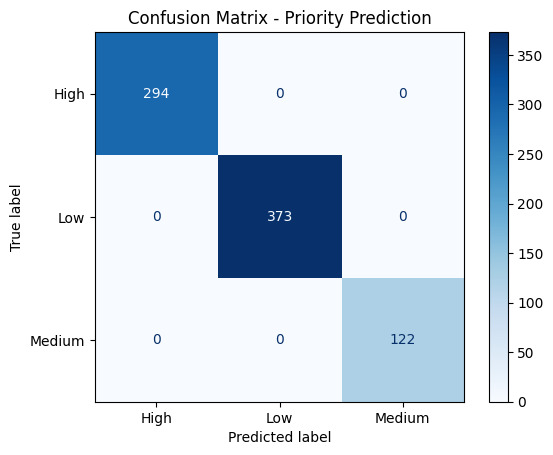

In [215]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_priority.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Priority Prediction")
plt.savefig('confusion_matrix.png')
plt.show()

#### Feature Importance plot

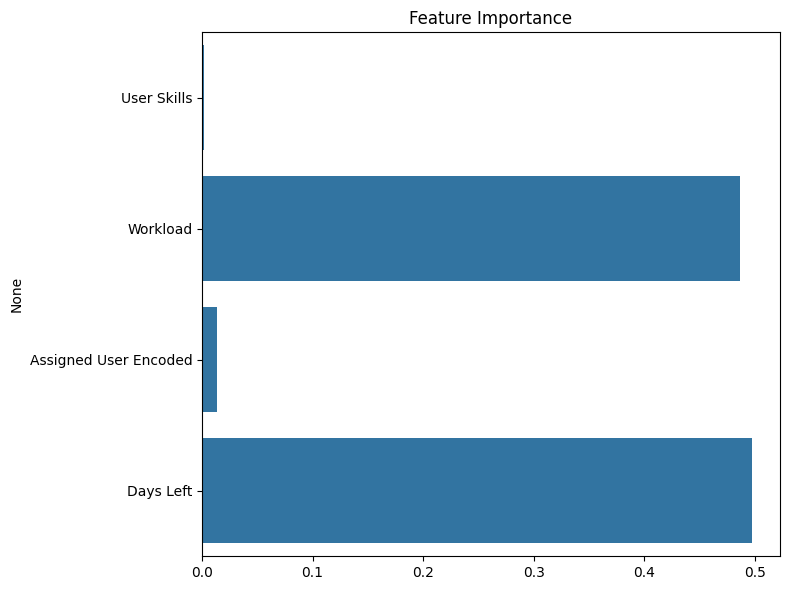

In [216]:
importances = final_rf.feature_importances_
features = X.columns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

#### Add predicted priority to dataframe with readable labels

In [217]:
df['Predicted Priority'] = le_priority.inverse_transform(final_rf.predict(X))

#### Summary table for top 10 tasks

In [218]:
summary = df[['User Skills', 'Workload', 'Assigned User', 'Priority', 'Predicted Priority', 'Task Type']]
print("\nSummary Table (Top 10 rows):")
print(summary.head(10))


Summary Table (Top 10 rows):
                                         User Skills  Workload Assigned User  \
0             git, networkx, supervisely, cleverhans         6    Unassigned   
1                         prometheus, spacy, asp.net         5         Rohan   
2     mobilenet, continuous integration, css, esrgan         2    Unassigned   
3                polyglot, api, load balancing, html         5       Robinsh   
4                        agile, yolov5, python, yolo         7    Unassigned   
5                           git, postgresql, laravel         8       Shivani   
6             facebook prophet, sqlite, slack, ci/cd         1    Unassigned   
7             facebook prophet, sqlite, slack, ci/cd         4    Unassigned   
8                            mobilenet, marianmt, go        10        Ashish   
9  cassandra, stable baselines, prophet, google c...         8    Unassigned   

  Priority Predicted Priority     Task Type  
0      Low                Low  General Task

###  **Step 2 : Dashboard Mockup**

####Distribution plots for predicted priority

<ipython-input-219-c8437ebb850a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Predicted Priority', palette='viridis')


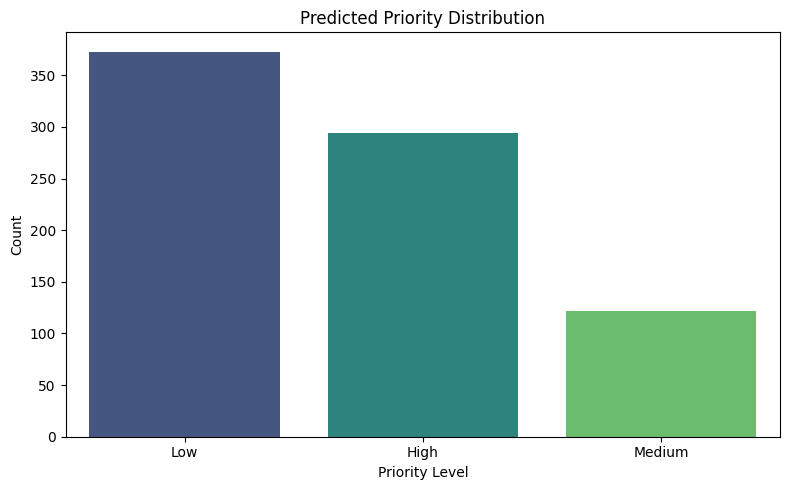

In [219]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Predicted Priority', palette='viridis')
plt.title('Predicted Priority Distribution')
plt.xlabel('Priority Level')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('predicted_priority_distribution.png')
plt.show()

####  Distribution plots for task type

<ipython-input-220-fe589f3cedb0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Task Type', palette='coolwarm')


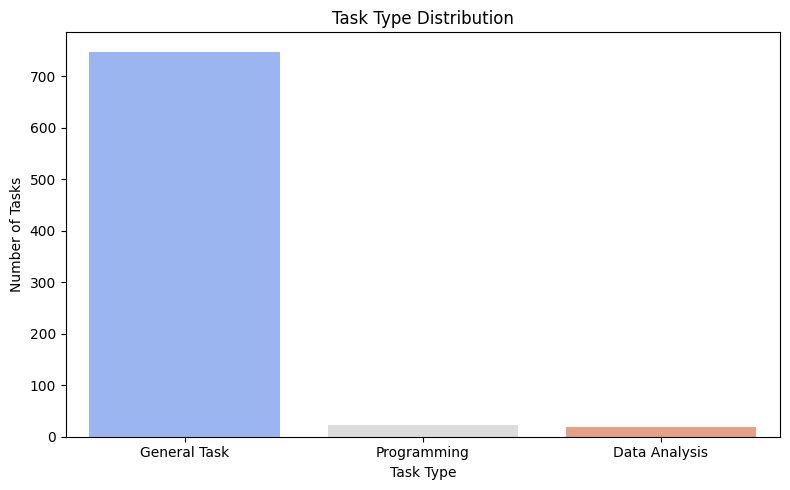

In [220]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Task Type', palette='coolwarm')
plt.title('Task Type Distribution')
plt.xlabel('Task Type')
plt.ylabel('Number of Tasks')
plt.tight_layout()
plt.savefig('task_type_distribution.png')
plt.show()

### Export Output Summary to CSV

In [221]:
summary.to_csv('Final_Task_Summary.csv', index=False)
print("Summary exported to Final_Task_Summary.csv")

Summary exported to Final_Task_Summary.csv


In [222]:
from google.colab import files
files.download('Final_Task_Summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>